In [1]:
import pandas as pd
import glob


In [6]:
import glob
import pandas as pd

enrol_files = glob.glob(
    r"C:\Users\Tanaya\Downloads\aadhaar-enrollment-main\aadhaar-enrollment-main\aadhaar-enrollment\data\enrollment\*.csv"
)

print(enrol_files)

enrol = pd.concat(
    [pd.read_csv(file) for file in enrol_files],
    ignore_index=True
)

enrol.head()


['C:\\Users\\Tanaya\\Downloads\\aadhaar-enrollment-main\\aadhaar-enrollment-main\\aadhaar-enrollment\\data\\enrollment\\api_data_aadhar_enrolment_0_500000.csv', 'C:\\Users\\Tanaya\\Downloads\\aadhaar-enrollment-main\\aadhaar-enrollment-main\\aadhaar-enrollment\\data\\enrollment\\api_data_aadhar_enrolment_1000000_1006029.csv', 'C:\\Users\\Tanaya\\Downloads\\aadhaar-enrollment-main\\aadhaar-enrollment-main\\aadhaar-enrollment\\data\\enrollment\\api_data_aadhar_enrolment_500000_1000000.csv']


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [7]:
demo_files = glob.glob(
    r"C:\Users\Tanaya\Downloads\aadhaar-enrollment-main\aadhaar-enrollment-main\aadhaar-enrollment\data\demographic\*.csv"
)

# Check if files are detected
print("Demographic files found:", demo_files)

# Read and combine all demographic CSVs
demo = pd.concat(
    [pd.read_csv(file) for file in demo_files],
    ignore_index=True
)

# Quick check
print("Demographic shape:", demo.shape)
demo.head()

Demographic files found: ['C:\\Users\\Tanaya\\Downloads\\aadhaar-enrollment-main\\aadhaar-enrollment-main\\aadhaar-enrollment\\data\\demographic\\api_data_aadhar_demographic_0_500000.csv', 'C:\\Users\\Tanaya\\Downloads\\aadhaar-enrollment-main\\aadhaar-enrollment-main\\aadhaar-enrollment\\data\\demographic\\api_data_aadhar_demographic_1000000_1500000.csv', 'C:\\Users\\Tanaya\\Downloads\\aadhaar-enrollment-main\\aadhaar-enrollment-main\\aadhaar-enrollment\\data\\demographic\\api_data_aadhar_demographic_1500000_2000000.csv', 'C:\\Users\\Tanaya\\Downloads\\aadhaar-enrollment-main\\aadhaar-enrollment-main\\aadhaar-enrollment\\data\\demographic\\api_data_aadhar_demographic_2000000_2071700.csv', 'C:\\Users\\Tanaya\\Downloads\\aadhaar-enrollment-main\\aadhaar-enrollment-main\\aadhaar-enrollment\\data\\demographic\\api_data_aadhar_demographic_500000_1000000.csv']
Demographic shape: (2071700, 6)


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


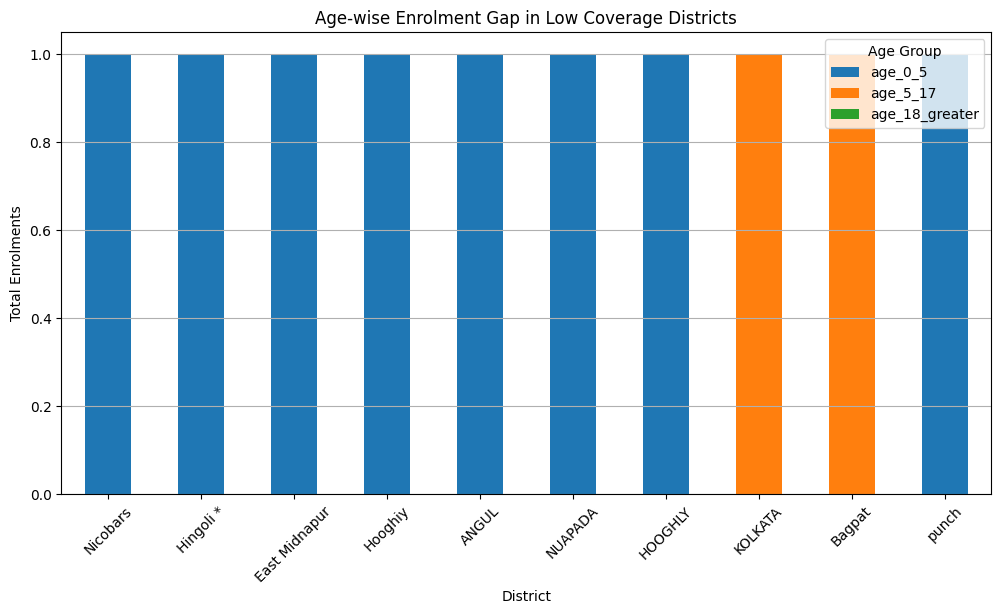

In [11]:
# Bottom districts by total enrolment
bottom_districts = (
    district_gap.sort_values('total_enrolment')
    .head(10)
    .set_index('district')
)

bottom_districts[
    ['age_0_5', 'age_5_17', 'age_18_greater']
].plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)

plt.title("Age-wise Enrolment Gap in Low Coverage Districts")
plt.xlabel("District")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.grid(axis='y')
plt.show()


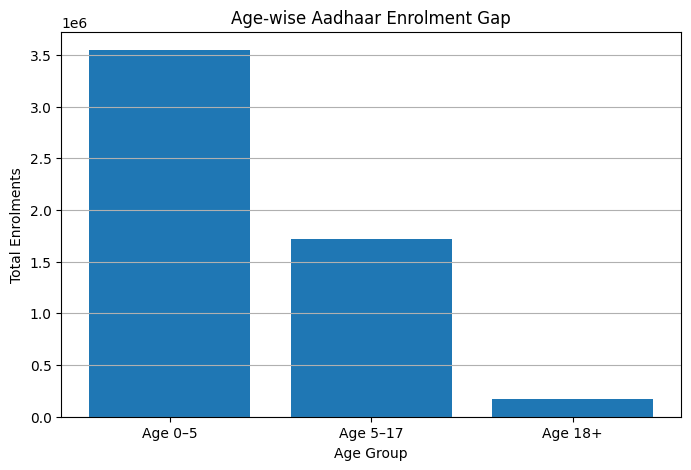

In [21]:
import matplotlib.pyplot as plt

age_gap = enrol[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

plt.figure(figsize=(8,5))
plt.bar(
    ['Age 0–5', 'Age 5–17', 'Age 18+'],
    age_gap.values
)

plt.title("Age-wise Aadhaar Enrolment Gap")
plt.xlabel("Age Group")
plt.ylabel("Total Enrolments")
plt.grid(axis='y')
plt.show()


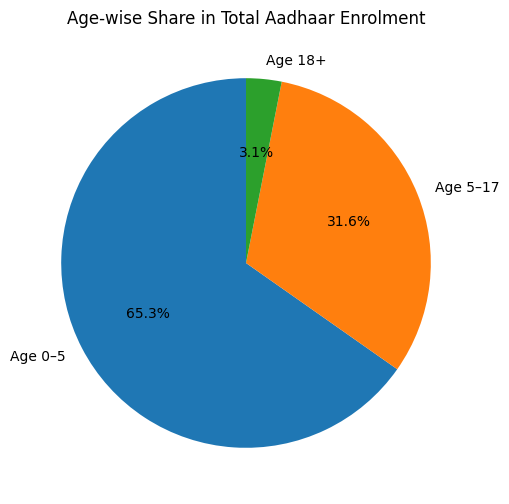

In [22]:
age_percentage = (age_gap / enrol['total_enrolment'].sum()) * 100

plt.figure(figsize=(6,6))
plt.pie(
    age_percentage,
    labels=['Age 0–5', 'Age 5–17', 'Age 18+'],
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Age-wise Share in Total Aadhaar Enrolment")
plt.show()


In [15]:
enrol['date'] = pd.to_datetime(
    enrol['date'],
    dayfirst=True,
    errors='coerce'
)
print(enrol['date'].isna().sum())


0


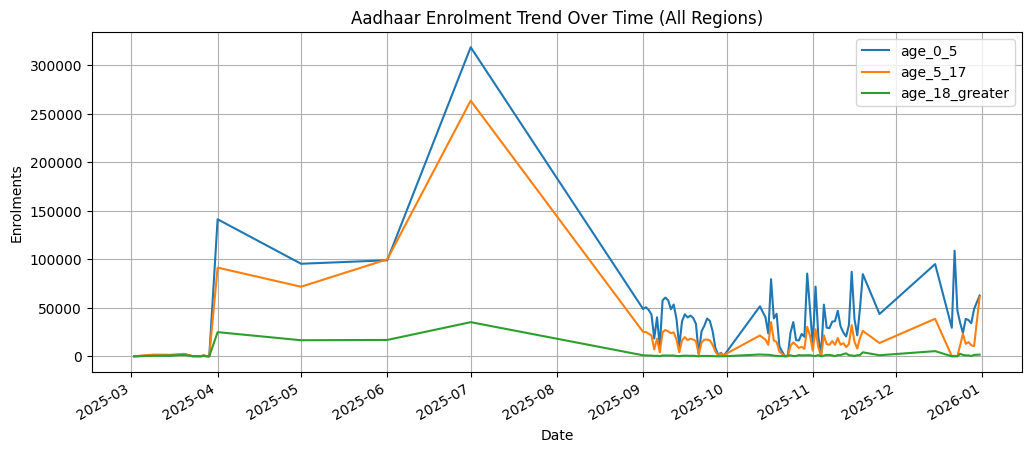

In [16]:
time_gap = (
    enrol.groupby('date')[['age_0_5', 'age_5_17', 'age_18_greater']]
    .sum()
)

time_gap.plot(figsize=(12,5))
plt.title("Aadhaar Enrolment Trend Over Time (All Regions)")
plt.xlabel("Date")
plt.ylabel("Enrolments")
plt.grid()
plt.show()



In [17]:
# Total Aadhaar enrolment (no age split)
enrol['total_enrolment'] = (
    enrol['age_0_5'] +
    enrol['age_5_17'] +
    enrol['age_18_greater']
)


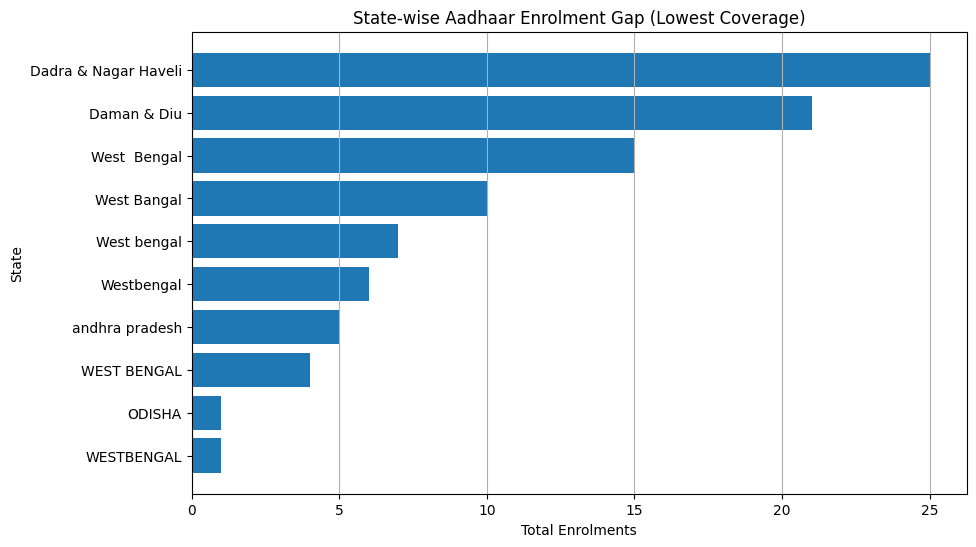

In [18]:
import matplotlib.pyplot as plt

state_enrol = (
    enrol.groupby('state')['total_enrolment']
    .sum()
    .reset_index()
    .sort_values('total_enrolment')
)

plt.figure(figsize=(10,6))
plt.barh(
    state_enrol['state'].head(10),
    state_enrol['total_enrolment'].head(10)
)

plt.title("State-wise Aadhaar Enrolment Gap (Lowest Coverage)")
plt.xlabel("Total Enrolments")
plt.ylabel("State")
plt.grid(axis='x')
plt.show()


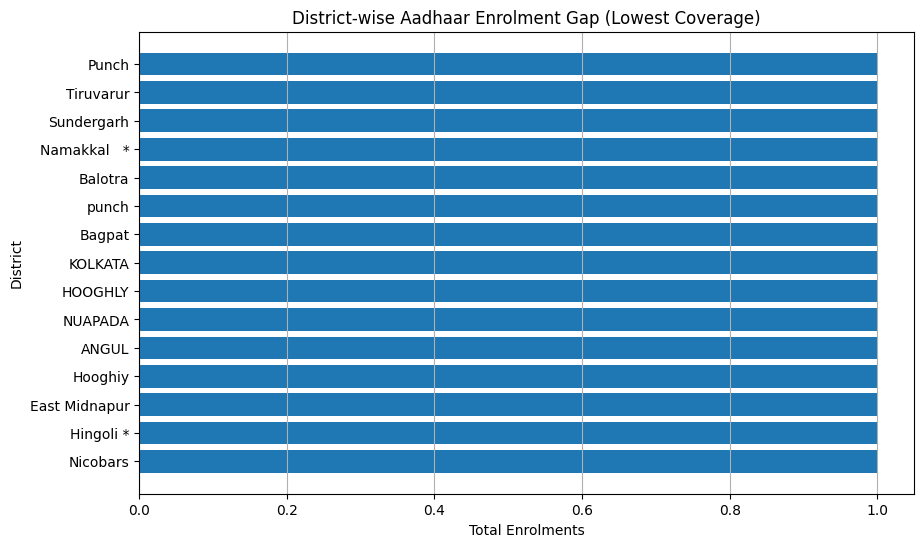

In [19]:
district_enrol = (
    enrol.groupby(['state', 'district'])['total_enrolment']
    .sum()
    .reset_index()
    .sort_values('total_enrolment')
)

plt.figure(figsize=(10,6))
plt.barh(
    district_enrol['district'].head(15),
    district_enrol['total_enrolment'].head(15)
)

plt.title("District-wise Aadhaar Enrolment Gap (Lowest Coverage)")
plt.xlabel("Total Enrolments")
plt.ylabel("District")
plt.grid(axis='x')
plt.show()


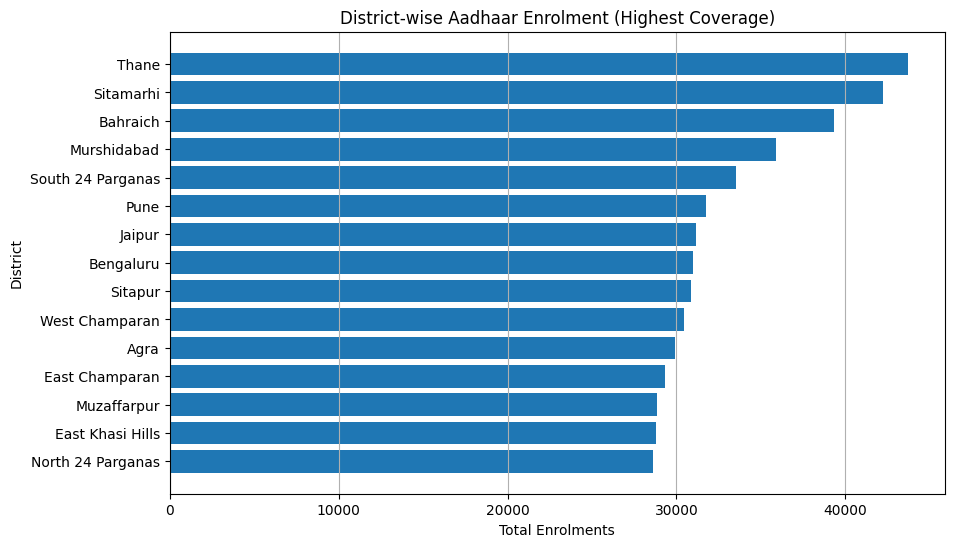

In [20]:
plt.figure(figsize=(10,6))
plt.barh(
    district_enrol['district'].tail(15),
    district_enrol['total_enrolment'].tail(15)
)

plt.title("District-wise Aadhaar Enrolment (Highest Coverage)")
plt.xlabel("Total Enrolments")
plt.ylabel("District")
plt.grid(axis='x')
plt.show()
